# Análise de subgrupos nos dados do ensino superior brasileiro

## Ingestão dos Dados

In [1]:
!pip install pysubgroup

In [3]:
import zipfile
with zipfile.ZipFile("./dados_educacao_superior-2018-2023.zip", 'r') as zip_ref:
    zip_ref.extractall('.')

In [2]:
import pandas as pd
import pysubgroup as ps
from pysubgroup import EqualitySelector

## Pré-processamento dos dados

### Filtrando apenas colunas mais relevantes do dataset


In [3]:
cols = ['ano', 'sigla_uf', 'id_municipio_nome', 'tipo_organizacao_academica', 'rede', 'nome_curso', 'nome_area_geral', 'tipo_modalidade_ensino', 'quantidade_ingressantes', 'quantidade_ingressantes_feminino', 'quantidade_ingressantes_masculino', 'quantidade_ingressantes_diurno', 'quantidade_ingressantes_noturno', 'quantidade_ingressantes_0_17', 'quantidade_ingressantes_18_24', 'quantidade_ingressantes_25_29', 'quantidade_ingressantes_30_34', 'quantidade_ingressantes_35_39', 'quantidade_ingressantes_40_49', 'quantidade_ingressantes_50_59', 'quantidade_ingressantes_60_mais', 'quantidade_ingressantes_branca', 'quantidade_ingressantes_preta', 'quantidade_ingressantes_parda', 'quantidade_ingressantes_amarela', 'quantidade_ingressantes_indigena', 'quantidade_ingressantes_cor_nao_declarada', 'quantidade_matriculas', 'quantidade_matriculas_feminino', 'quantidade_matriculas_masculino', 'quantidade_matriculas_diurno', 'quantidade_matriculas_noturno', 'quantidade_matriculas_0_17', 'quantidade_matriculas_18_24', 'quantidade_matriculas_25_29', 'quantidade_matriculas_30_34', 'quantidade_matriculas_35_39', 'quantidade_matriculas_40_49', 'quantidade_matriculas_50_59', 'quantidade_matriculas_60_mais', 'quantidade_matriculas_branca', 'quantidade_matriculas_preta', 'quantidade_matriculas_parda', 'quantidade_matriculas_amarela', 'quantidade_matriculas_indigena', 'quantidade_matriculas_cor_nao_declarada', 'quantidade_concluintes', 'quantidade_concluintes_feminino', 'quantidade_concluintes_masculino', 'quantidade_concluintes_diurno', 'quantidade_concluintes_noturno', 'quantidade_concluintes_0_17', 'quantidade_concluintes_18_24', 'quantidade_concluintes_25_29', 'quantidade_concluintes_30_34', 'quantidade_concluintes_35_39', 'quantidade_concluintes_40_49', 'quantidade_concluintes_50_59', 'quantidade_concluintes_60_mais', 'quantidade_concluintes_branca', 'quantidade_concluintes_preta', 'quantidade_concluintes_parda', 'quantidade_concluintes_amarela', 'quantidade_concluintes_indigena', 'quantidade_concluintes_cor_nao_declarada',  'quantidade_alunos_deficiencia', 'quantidade_ingressantes_deficiencia', 'quantidade_matriculas_deficiencia', 'quantidade_concluintes_deficiencia', 'quantidade_ingressantes_financiamento',  'quantidade_matriculas_financiamento', 'quantidade_concluintes_financiamento', 'quantidade_ingressantes_reserva_vaga', 'quantidade_ingressantes_reserva_vaga_rede_publica', 'quantidade_ingressantes_reserva_vaga_etnico', 'quantidade_ingressantes_reserva_vaga_deficiencia', 'quantidade_ingressantes_reserva_vaga_social_renda_familiar', 'quantidade_ingressantes_reserva_vaga_outros', 'quantidade_matriculas_reserva_vaga', 'quantidade_matriculas_reserva_vaga_rede_publica', 'quantidade_matriculas_reserva_vaga_etnico', 'quantidade_matriculas_reserva_vaga_deficiencia', 'quantidade_matriculas_reserva_vaga_social_renda_familiar', 'quantidade_matriculas_reserva_vaga_outros', 'quantidade_concluintes_reserva_vaga', 'quantidade_concluintes_reserva_vaga_rede_publica', 'quantidade_concluintes_reserva_vaga_etnico', 'quantidade_concluintes_reserva_vaga_deficiencia', 'quantidade_concluintes_reserva_vaga_social_renda_familiar', 'quantidade_concluintes_reserva_vaga_outros', 'quantidade_alunos_situacao_trancada', 'quantidade_alunos_situacao_desvinculada', 'quantidade_alunos_situacao_transferida', 'quantidade_alunos_situacao_falecidos', 'quantidade_ingressantes_apoio_social', 'quantidade_matriculas_apoio_social', 'quantidade_concluintes_apoio_social',  'quantidade_ingressantes_atividade_extracurricular', 'quantidade_matriculas_atividade_extracurricular', 'quantidade_concluintes_atividade_extracurricular',  'quantidade_ingressantes_mobilidade_academica', 'quantidade_matriculas_mobilidade_academica', 'quantidade_concluintes_mobilidade_academica']
df = pd.read_csv('dados_educacao_superior-2018-2023.csv', usecols=cols)

Foram separadas as colunas categóricas iniciais do dataset e porteriormente as colunas relacionadas a quantidade de ingressantes, concluintes e matrículas. A ideia inicial era trabalhar com a taxa de conclusão, que seria o número de concluintes em 2023 em comparação com os ingressantes em 2018, 2019 e 2020 (provavelmente os anos de ingresso de quem se forma em 2023).

Colunas como quantidade_matriculas, quantidade_alunos_situacao_trancada, e outras semelhantes foram preservadas.

Além disso, o dataset traz quantidades absolutas de alunos nas faculdades. Porém, como cada faculdade tem seu tamanho, esses dados foram transformados em relativos, como feito a seguir.

In [4]:
df['ingressantes_feminino'] = df['quantidade_ingressantes_feminino'] / df['quantidade_ingressantes']
df['ingressantes_masculino'] = df['quantidade_ingressantes_masculino'] / df['quantidade_ingressantes']

df['ingressantes_diurno'] = df['quantidade_ingressantes_diurno'] / df['quantidade_ingressantes']
df['ingressantes_noturno'] = df['quantidade_ingressantes_noturno'] / df['quantidade_ingressantes']

df['ingressantes_ate_24'] = (df['quantidade_ingressantes_0_17'] + df['quantidade_ingressantes_18_24']) / df['quantidade_ingressantes']
df['ingressantes_25_39'] = (df['quantidade_ingressantes_25_29'] + df['quantidade_ingressantes_30_34'] + df['quantidade_ingressantes_35_39']) / df['quantidade_ingressantes']
df['ingressantes_40_mais'] = (df['quantidade_ingressantes_40_49'] + df['quantidade_ingressantes_50_59'] + df['quantidade_ingressantes_60_mais']) / df['quantidade_ingressantes']

df['ingressantes_branca'] = df['quantidade_ingressantes_branca'] / df['quantidade_ingressantes']
df['ingressantes_nao_branca'] = (df['quantidade_ingressantes'] - df['quantidade_ingressantes_branca'] - df['quantidade_ingressantes_cor_nao_declarada']) / df['quantidade_ingressantes']

df['concluintes_feminino'] = df['quantidade_concluintes_feminino'] / df['quantidade_concluintes']
df['concluintes_masculino'] = df['quantidade_concluintes_masculino'] / df['quantidade_concluintes']

df['concluintes_diurno'] = df['quantidade_concluintes_diurno'] / df['quantidade_concluintes']
df['concluintes_noturno'] = df['quantidade_concluintes_noturno'] / df['quantidade_concluintes']

df['concluintes_ate_24'] = (df['quantidade_concluintes_0_17'] + df['quantidade_concluintes_18_24']) / df['quantidade_concluintes']
df['concluintes_25_39'] = (df['quantidade_concluintes_25_29'] + df['quantidade_concluintes_30_34'] + df['quantidade_concluintes_35_39']) / df['quantidade_concluintes']
df['concluintes_40_mais'] = (df['quantidade_concluintes_40_49'] +df['quantidade_concluintes_50_59'] + df['quantidade_concluintes_60_mais']) / df['quantidade_concluintes']

df['concluintes_branca'] = df['quantidade_concluintes_branca'] / df['quantidade_concluintes']
df['concluintes_nao_branca'] = (df['quantidade_concluintes'] - df['quantidade_concluintes_branca'] - df['quantidade_concluintes_cor_nao_declarada']) / df['quantidade_concluintes']


In [5]:
df['ingressantes_reserva_vaga'] = df['quantidade_ingressantes_reserva_vaga'] / df['quantidade_ingressantes']
df['ingressantes_reserva_vaga_rede_publica'] = df['quantidade_ingressantes_reserva_vaga_rede_publica'] / df['quantidade_ingressantes']
df['ingressantes_reserva_vaga_etnico'] = df['quantidade_ingressantes_reserva_vaga_etnico'] / df['quantidade_ingressantes']
df['ingressantes_reserva_vaga_deficiencia'] = df['quantidade_ingressantes_reserva_vaga_deficiencia'] / df['quantidade_ingressantes']
df['ingressantes_reserva_vaga_social_renda_familiar'] = df['quantidade_ingressantes_reserva_vaga_social_renda_familiar'] / df['quantidade_ingressantes']
df['ingressantes_reserva_vaga_outros'] = df['quantidade_ingressantes_reserva_vaga_outros'] / df['quantidade_ingressantes']

df['concluintes_reserva_vaga'] = df['quantidade_concluintes_reserva_vaga'] / df['quantidade_concluintes']
df['concluintes_reserva_vaga_rede_publica'] = df['quantidade_concluintes_reserva_vaga_rede_publica'] / df['quantidade_concluintes']
df['concluintes_reserva_vaga_etnico'] = df['quantidade_concluintes_reserva_vaga_etnico'] / df['quantidade_concluintes']
df['concluintes_reserva_vaga_deficiencia'] = df['quantidade_concluintes_reserva_vaga_deficiencia'] / df['quantidade_concluintes']
df['concluintes_reserva_vaga_social_renda_familiar'] = df['quantidade_concluintes_reserva_vaga_social_renda_familiar'] / df['quantidade_concluintes']
df['concluintes_reserva_vaga_outros'] = df['quantidade_concluintes_reserva_vaga_outros'] / df['quantidade_concluintes']

In [6]:
df['ingressantes_deficiencia'] = df['quantidade_ingressantes_deficiencia'] / df['quantidade_ingressantes']
df['concluintes_deficiencia'] = df['quantidade_concluintes_deficiencia'] / df['quantidade_concluintes']

df['ingressantes_financiamento'] = df['quantidade_ingressantes_financiamento'] / df['quantidade_ingressantes']
df['concluintes_financiamento'] = df['quantidade_concluintes_financiamento'] / df['quantidade_concluintes']

df['ingressantes_apoio_social'] = df['quantidade_ingressantes_apoio_social'] / df['quantidade_ingressantes']
df['concluintes_apoio_social'] = df['quantidade_concluintes_apoio_social'] / df['quantidade_concluintes']

df['ingressantes_atividade_extracurricular'] = df['quantidade_ingressantes_atividade_extracurricular'] / df['quantidade_ingressantes']
df['concluintes_atividade_extracurricular'] = df['quantidade_concluintes_atividade_extracurricular'] / df['quantidade_concluintes']

df['ingressantes_mobilidade_academica'] = df['quantidade_ingressantes_mobilidade_academica'] / df['quantidade_ingressantes']
df['concluintes_mobilidade_academica'] = df['quantidade_concluintes_mobilidade_academica'] / df['quantidade_concluintes']

Uma vez que os dados foram transformados em proporções, podemos excluir as colunas com valores absolutos

In [7]:
colunas_para_remover = [col for col in df.columns if col.startswith('quantidade_ingressantes_') or col.startswith('quantidade_concluintes_')]

# Filtrar colunas
df_prop = df.drop(columns=colunas_para_remover)

### Normalizando nomes

Percebemos que em alguns anos os nomes dos cursos aparecem em caixa alta, enquanto em outros ficam em minúsculas. Assim, deixamos todas em caixa alta para conseguir realizar os agrupamentos. Além disso, realizamos algumas filtragens à mão de cursos que tinham nomes muito semelhantes.

In [8]:
df_prop['nome_curso'] = df_prop['nome_curso'].str.upper()

mapa_de_correcao = {
    'letras - língua portuguesa': 'letras - português',

    'letras português e inglês': 'letras - português-inglês',
    'letras - língua portuguesa e língua inglesa': 'letras - português-inglês',

    'letras - língua portuguesa e libras': 'letras - portugues/libras',
    'letras - libras - língua portuguesa': 'letras - portugues/libras',
    'ciências da computação': 'ciência da computação',
    'ciências econômicas': 'ciência econômica',
    'ciências de dados': 'ciência de dados',
    'ciências políticas': 'ciência políticas',
    'gestão da produção industrial': 'gestão de produção industrial',
}
df_prop['nome_curso'] = df_prop['nome_curso'].replace(mapa_de_correcao)

In [9]:
df_prop['nome_curso'].head()

,nome_curso
0,ACUPUNTURA
1,TERAPIAS INTEGRATIVAS E COMPLEMENTARES
2,PRÁTICAS INTEGRATIVAS E COMPLEMENTARES
3,SAÚDE COLETIVA
4,AGENTE COMUNITÁRIO


### Dados separados por ano
Os dados foram separados por anos para facilitar as agregações futuras. Além disso, também foram removidas as duplicatas.

In [10]:
df_prop_2018 = df_prop[df_prop['ano'] == 2018]
df_prop_2019 = df_prop[df_prop['ano'] == 2019]
df_prop_2020 = df_prop[df_prop['ano'] == 2020]
df_prop_2021 = df_prop[df_prop['ano'] == 2021]
df_prop_2022 = df_prop[df_prop['ano'] == 2022]
df_prop_2023 = df_prop[df_prop['ano'] == 2023]

In [11]:
df_prop_2018.drop_duplicates(subset=['sigla_uf', 'id_municipio_nome',	'tipo_organizacao_academica',	'rede',	'nome_curso', 'nome_area_geral', 'tipo_modalidade_ensino'], inplace=True)
df_prop_2019.drop_duplicates(subset=['sigla_uf', 'id_municipio_nome',	'tipo_organizacao_academica',	'rede',	'nome_curso', 'nome_area_geral', 'tipo_modalidade_ensino'], inplace=True)
df_prop_2020.drop_duplicates(subset=['sigla_uf', 'id_municipio_nome',	'tipo_organizacao_academica',	'rede',	'nome_curso', 'nome_area_geral', 'tipo_modalidade_ensino'], inplace=True)
df_prop_2021.drop_duplicates(subset=['sigla_uf', 'id_municipio_nome',	'tipo_organizacao_academica',	'rede',	'nome_curso', 'nome_area_geral', 'tipo_modalidade_ensino'], inplace=True)
df_prop_2022.drop_duplicates(subset=['sigla_uf', 'id_municipio_nome',	'tipo_organizacao_academica',	'rede',	'nome_curso', 'nome_area_geral', 'tipo_modalidade_ensino'], inplace=True)
df_prop_2023.drop_duplicates(subset=['sigla_uf', 'id_municipio_nome',	'tipo_organizacao_academica',	'rede',	'nome_curso', 'nome_area_geral', 'tipo_modalidade_ensino'], inplace=True)

/tmp/ipython-input-11-1779749477.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_prop_2018.drop_duplicates(subset=['sigla_uf', 'id_municipio_nome',	'tipo_organizacao_academica',	'rede',	'nome_curso', 'nome_area_geral', 'tipo_modalidade_ensino'], inplace=True)
/tmp/ipython-input-11-1779749477.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_prop_2019.drop_duplicates(subset=['sigla_uf', 'id_municipio_nome',	'tipo_organizacao_academica',	'rede',	'nome_curso', 'nome_area_geral', 'tipo_modalidade_ensino'], inplace=True)
/tmp/ipython-input-11-1779749477.py:3: SettingWithCopyWarning: 
A value is trying to be set 

### Juntando as bases
Conforme explicado anteriormente, para fazer as comparações, precisaremos agregar os dados de acordo com os anos.

A ideia inicial era trabalhar com a taxa de conclusão. Portanto, precisaríamos olhar para um intervalo de 4 a 6 anos antes de 2023, que seria o provável ingresso dos estudantes para conseguirem concluir o curso em 2023. No entanto, essa agregação inicial foi feita, mas os resultados não foram tão bons: a maioria dos subgrupos encontrados tinham valores muito próximos de 0, o que não é tão relevante. Isso será melhor explorado no artigo. Na sequência, tem a diferença entre a quantidade de concluintes e a de matricula para comparação.

In [12]:
keys = ["sigla_uf", "id_municipio_nome",	"tipo_organizacao_academica",	"rede",	"nome_curso", "nome_area_geral", "tipo_modalidade_ensino"]
merged_2018_2023 = df_prop_2018.merge(df_prop_2023, how='inner', left_on=keys, right_on=keys, suffixes=('_2018','_2023'))

In [13]:
merged_2018_2023['quantidade_concluintes_2018'].head()


,quantidade_concluintes_2018
0,0
1,3
2,4
3,0
4,1


Aqui, é possível observar a discrepância a quantidade de concluintes e a de trancamento. Como existem mais dados de trancamento (e matrícula também), é mis interessante olha para a evasão.

In [16]:
merged_2018_2023['quantidade_alunos_situacao_trancada_2018'].head()

,quantidade_alunos_situacao_trancada_2018
0,14
1,1
2,3
3,4
4,18


Abaixo, está plotada a diferença entre os ingressantes no diurno e o grupo feminino, por exemplo. Por isso, optou-se por retirar os dados relacionados a diurno/noturno.

(array([79737.,   284.,   440.,   610.,   967.,   785.,   280.,   124.,
           96.,  5802.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

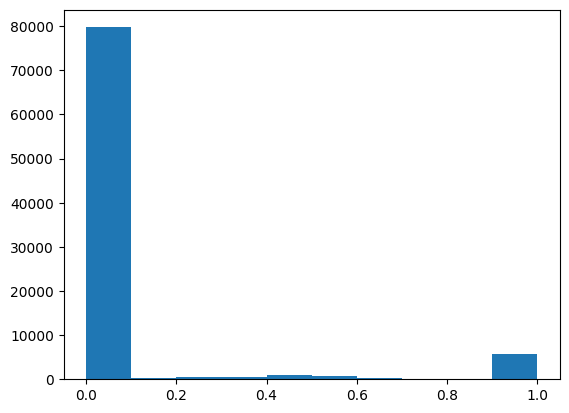

In [17]:
import matplotlib.pyplot as plt
plt.hist(merged_2018_2023['ingressantes_diurno_2018'])


(array([21335.,  3108.,  5282.,  6010.,  4842., 12736.,  6649.,  4834.,
         4448., 19881.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

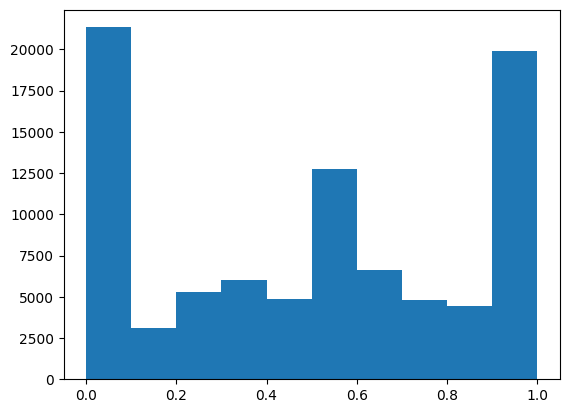

In [18]:
plt.hist(merged_2018_2023['ingressantes_feminino_2018'])

Assim, optamos por seguir com uma outra taxa de comparação para ser o alvo: a taxa de evasão, representada pela quantidade de trancamentos e desligamentos dividida pelas matriculas daquele ano. Como atributos analisados, continuamos explorando a quantidade de ingressantes em anos anteriores: se a pessoa ingressou em 2018, ela provavelmente está fazendo matérias em 2019, 2020 e assim sucessivamente.

In [14]:
merged_2022_2023 = df_prop_2022.merge(df_prop_2023, how='inner', left_on=keys, right_on=keys, suffixes=('_2022','_2023'))
merged_2021_2023 = df_prop_2021.merge(df_prop_2023, how='inner', left_on=keys, right_on=keys, suffixes=('_2021','_2023'))
merged_2020_2023 = df_prop_2020.merge(df_prop_2023, how='inner', left_on=keys, right_on=keys, suffixes=('_2020','_2023'))
merged_2019_2023 = df_prop_2019.merge(df_prop_2023, how='inner', left_on=keys, right_on=keys, suffixes=('_2019','_2023'))


In [25]:
len(merged_2022_2023)

284214

## Execução do algoritmo

In [15]:
ano_desejado = 2020
df_new = merged_2020_2023
categ_cols = ['sigla_uf', 'id_municipio_nome', 'tipo_organizacao_academica', 'rede', 'nome_curso', 'nome_area_geral', 'tipo_modalidade_ensino',
              'ingressantes_feminino_{}'.format(ano_desejado), 'ingressantes_masculino_{}'.format(ano_desejado), 'ingressantes_branca_{}'.format(ano_desejado), 'ingressantes_nao_branca_{}'.format(ano_desejado),
              'ingressantes_ate_24_{}'.format(ano_desejado), 'ingressantes_25_39_{}'.format(ano_desejado), 'ingressantes_40_mais_{}'.format(ano_desejado),
              'ingressantes_financiamento_{}'.format(ano_desejado), 'ingressantes_mobilidade_academica_{}'.format(ano_desejado)]

In [36]:
all_selectors = ps.create_selectors(df_new[categ_cols])
filtered_selectors = []
for sel in all_selectors:
    # verificamos só Equalities e valor exato 0.0
    if isinstance(sel, EqualitySelector) and sel.attribute_value == 0:
        continue
    filtered_selectors.append(sel)

In [37]:
# Pré-processamento: criar variável alvo (taxa de conclusão)
df_new['taxa_evasao'] = (df_new['quantidade_alunos_situacao_trancada_2023'] + df_new['quantidade_alunos_situacao_desvinculada_2023'] ) / df_new['quantidade_matriculas_2023']
df_new = df_new[df_new['quantidade_matriculas_2023'] > 0]  # evitar divisão por zero

# Definir a tarefa de SD: queremos subgrupos com taxa_conclusao alta
target = ps.NumericTarget('taxa_evasao')

# Definir a tarefa
task = ps.SubgroupDiscoveryTask(
    df_new,
    target,
    search_space=filtered_selectors,
    result_set_size=10,
    depth=3,
    qf=ps.StandardQFNumeric(a=1.0)  # Variação entre "invert=True" e "False" para trazer os registros
)

In [38]:
#Rodar BeamSearch
beam_results = ps.BeamSearch(beam_width=10).execute(task)

#Exibir os top 5 subgrupos
for sg in beam_results.results[:5]:
    print(sg)

(np.float64(4020.7658329439423), (ingressantes_financiamento_2020: [0.0:0.0028169014084507044[ and rede=='Privada ' and tipo_organizacao_academica=='Centro Universitário'), StandardQFNumeric_parameters(size_sg=24270, mean=np.float64(0.9709618478910288), estimate=np.float64(12217.168915116765)))
(np.float64(3998.0841463745483), (ingressantes_financiamento_2020: [0.0:0.0028169014084507044[ and tipo_organizacao_academica=='Centro Universitário'), StandardQFNumeric_parameters(size_sg=24313, mean=np.float64(0.9697359433657736), estimate=np.float64(12217.252510300861)))
(np.float64(3998.0841463745483), (ingressantes_financiamento_2020: [0.0:0.0028169014084507044[ and ingressantes_mobilidade_academica_2020: [0.0:0.0015723270440251573[ and tipo_organizacao_academica=='Centro Universitário'), StandardQFNumeric_parameters(size_sg=24313, mean=np.float64(0.9697359433657736), estimate=np.float64(12217.252510300861)))
(np.float64(3445.5073247981272), (ingressantes_financiamento_2020: [0.0:0.00281690

In [32]:
def summarize_results(results, label):
    return pd.DataFrame([{
        'Algoritmo': label,
        'Qualidade': round(sg[0], 4),
        'Cobertura': sg[2].size_sg,
        'Regra': str(sg[1]),
        'Média Alvo': round(df_new['taxa_evasao'].mean(), 2)
    } for sg in results])

In [33]:
beam_df = summarize_results(beam_results.results, 'BeamSearch')

comparison = pd.concat([beam_df], ignore_index=True)

In [34]:
# resultados ordenados pela taxa de evasão mais alta
comparison.sort_values('Qualidade').iloc[::-1]

,Algoritmo,Qualidade,Cobertura,Regra,Média Alvo
0,BeamSearch,4020.7658,24270,ingressantes_financiamento_2020: [0.0:0.00[ AN...,0.81
2,BeamSearch,3998.0841,24313,ingressantes_financiamento_2020: [0.0:0.00[ AN...,0.81
1,BeamSearch,3998.0841,24313,ingressantes_financiamento_2020: [0.0:0.00[ AN...,0.81
3,BeamSearch,3445.5073,23706,ingressantes_financiamento_2020: [0.0:0.00[ AN...,0.81
4,BeamSearch,3221.1539,54696,ingressantes_financiamento_2020: [0.0:0.00[ AN...,0.81
5,BeamSearch,3220.4649,54700,ingressantes_financiamento_2020: [0.0:0.00[ AN...,0.81
6,BeamSearch,2680.9172,34840,ingressantes_25_39_2020: [0.50:1.0[ AND ingres...,0.81
7,BeamSearch,2676.0742,34848,ingressantes_25_39_2020: [0.50:1.0[ AND rede==...,0.81
8,BeamSearch,2425.2923,36471,ingressantes_25_39_2020: [0.50:1.0[ AND ingres...,0.81
9,BeamSearch,2423.5200,52422,ingressantes_financiamento_2020: [0.0:0.00[ AN...,0.81


### Alguns resultados obtidos

In [ ]:
# resultados ordenados pela taxa de evasão mais baixa
comparison.sort_values('Qualidade').iloc[::-1]

,Algoritmo,Qualidade,Cobertura,Regra,Média Alvo
0,BeamSearch,9582.3532,26756,tipo_modalidade_ensino==2 AND tipo_organizacao...,0.71
1,BeamSearch,9582.3532,26756,rede=='Privada ' AND tipo_modalidade_ensino==2...,0.71
2,BeamSearch,9442.9691,29455,rede=='Privada ' AND tipo_organizacao_academic...,0.71
3,BeamSearch,9400.0112,29534,tipo_organizacao_academica=='Centro Universitá...,0.71
4,BeamSearch,5429.5395,13880,ingressantes_40_mais_2018: [0.0:0.00[ AND tipo...,0.71
5,BeamSearch,5380.9610,14784,ingressantes_40_mais_2018: [0.0:0.00[ AND rede...,0.71
6,BeamSearch,5363.4867,14820,ingressantes_40_mais_2018: [0.0:0.00[ AND tipo...,0.71
7,BeamSearch,5266.1495,12484,ingressantes_nao_branca_2018: [0.0:0.15[ AND t...,0.71
8,BeamSearch,5182.3211,13208,ingressantes_nao_branca_2018: [0.0:0.15[ AND r...,0.71
9,BeamSearch,5164.7839,13242,ingressantes_nao_branca_2018: [0.0:0.15[ AND t...,0.71


from matplotlib import pyplot as plt
_df_0['Qualidade'].plot(kind='hist', bins=20, title='Qualidade')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Cobertura'].plot(kind='hist', bins=20, title='Cobertura')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='Qualidade', y='Cobertura', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Média Alvo']
  ys = series['Qualidade']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('Média Alvo', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Média Alvo')
_ = plt.ylabel('Qualidade')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Média Alvo']
  ys = series['Cobertura']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('Média Alvo', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Média Alvo')
_ = plt.ylabel('Cobertura')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Média Alvo']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Média Alvo'}, axis=1)
              .sort_values('Média Alvo', ascending=True))
  xs = counted['Média Alvo']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('Média Alvo', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Média Alvo')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_6['Qualidade'].plot(kind='line', figsize=(8, 4), title='Qualidade')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_7['Cobertura'].plot(kind='line', figsize=(8, 4), title='Cobertura')
plt.gca().spines[['top', 'right']].set_visible(False)

In [45]:
comparison.to_csv('resultados_comparacao_2020.csv', index=False)

In [39]:
df_normal_2022 = pd.read_csv('resultados_comparacao_2022.csv')
df_normal_2022

,Algoritmo,Qualidade,Cobertura,Regra,Média Alvo
0,BeamSearch,6920.3576,44427,ingressantes_25_39_2022: [0.50:1.0[ AND ingres...,0.75
1,BeamSearch,6919.6845,44428,ingressantes_25_39_2022: [0.50:1.0[ AND rede==...,0.75
2,BeamSearch,6588.7300,46675,ingressantes_25_39_2022: [0.50:1.0[ AND ingres...,0.75
3,BeamSearch,6587.5366,46677,ingressantes_25_39_2022: [0.50:1.0[,0.75
4,BeamSearch,6408.3490,43277,ingressantes_25_39_2022: [0.50:1.0[ AND rede==...,0.75
5,BeamSearch,6192.6323,150477,ingressantes_mobilidade_academica_2022: [0.0:0...,0.75
6,BeamSearch,6167.2591,74212,ingressantes_mobilidade_academica_2022: [0.0:0...,0.75
7,BeamSearch,6070.8430,74100,ingressantes_mobilidade_academica_2022: [0.0:0...,0.75
8,BeamSearch,6054.5219,45195,ingressantes_25_39_2022: [0.50:1.0[ AND tipo_m...,0.75
9,BeamSearch,6054.5219,45195,ingressantes_25_39_2022: [0.50:1.0[ AND ingres...,0.75


In [31]:
df_normal_2020 = pd.read_csv('resultados_comparacao_2020_invertido.csv')
df_normal_2020

,Algoritmo,Qualidade,Cobertura,Regra,Média Alvo
0,BeamSearch,4020.7658,24270,ingressantes_financiamento_2020: [0.0:0.00[ AN...,0.81
1,BeamSearch,3998.0841,24313,ingressantes_financiamento_2020: [0.0:0.00[ AN...,0.81
2,BeamSearch,3998.0841,24313,ingressantes_financiamento_2020: [0.0:0.00[ AN...,0.81
3,BeamSearch,3445.5073,23706,ingressantes_financiamento_2020: [0.0:0.00[ AN...,0.81
4,BeamSearch,3221.1539,54696,ingressantes_financiamento_2020: [0.0:0.00[ AN...,0.81
5,BeamSearch,3220.4649,54700,ingressantes_financiamento_2020: [0.0:0.00[ AN...,0.81
6,BeamSearch,2680.9172,34840,ingressantes_25_39_2020: [0.50:1.0[ AND ingres...,0.81
7,BeamSearch,2676.0742,34848,ingressantes_25_39_2020: [0.50:1.0[ AND rede==...,0.81
8,BeamSearch,2425.2923,36471,ingressantes_25_39_2020: [0.50:1.0[ AND ingres...,0.81
9,BeamSearch,2423.5200,52422,ingressantes_financiamento_2020: [0.0:0.00[ AN...,0.81


from matplotlib import pyplot as plt
df_normal_2020['Qualidade'].plot(kind='hist', bins=20, title='Qualidade')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_normal_2020['Cobertura'].plot(kind='hist', bins=20, title='Cobertura')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_normal_2020.plot(kind='scatter', x='Qualidade', y='Cobertura', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Média Alvo']
  ys = series['Qualidade']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df_normal_2020.sort_values('Média Alvo', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Média Alvo')
_ = plt.ylabel('Qualidade')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Média Alvo']
  ys = series['Cobertura']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df_normal_2020.sort_values('Média Alvo', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Média Alvo')
_ = plt.ylabel('Cobertura')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Média Alvo']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Média Alvo'}, axis=1)
              .sort_values('Média Alvo', ascending=True))
  xs = counted['Média Alvo']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df_normal_2020.sort_values('Média Alvo', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Média Alvo')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
df_normal_2020['Qualidade'].plot(kind='line', figsize=(8, 4), title='Qualidade')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df_normal_2020['Cobertura'].plot(kind='line', figsize=(8, 4), title='Cobertura')
plt.gca().spines[['top', 'right']].set_visible(False)

Distribuição do subgrupo em comparação com o dataset

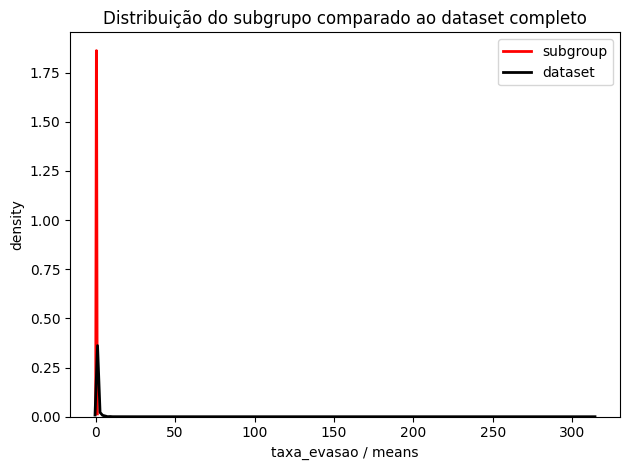

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Recuperar Subgrupo com definição: ingressantes_mobilidade_academica_2022: [0.0:0.00[ AND rede=='Privada ' AND tipo_modalidade_ensino==2
merged_2022_2023['taxa_evasao'] = (merged_2022_2023['quantidade_alunos_situacao_trancada_2023'] + merged_2022_2023['quantidade_alunos_situacao_desvinculada_2023'] ) / merged_2022_2023['quantidade_matriculas_2023']
df_sg = merged_2022_2023[
                (merged_2022_2023['ingressantes_mobilidade_academica_2022'] > 0.00) &
                (merged_2022_2023['rede'] ==  'Privada ') &
                (merged_2022_2023['tipo_modalidade_ensino'] == 2)
              ]

sns.kdeplot(df_sg['taxa_evasao'], label='subgroup', color='red', linewidth=2)

sns.kdeplot(merged_2022_2023['taxa_evasao'], label='dataset', color='black', linewidth=2)

plt.xlabel('taxa_evasao / means')
plt.ylabel('density')
plt.title('Distribuição do subgrupo comparado ao dataset completo')
plt.legend()

plt.tight_layout()
plt.show()